## Part 1 -- Analysis of total expenditure from 2009 to 2018

In [185]:
import numpy as np
import pandas as pd

Read all the *detail.csv.  
Renamed "2015Q2-house-disburse-detail.csv" to 
"2015Q2-house-disburse-detail-old.csv"
Then renamed "2015Q2-house-disburse-detail-updated.csv" to 
"2015Q2-house-disburse-detail.csv".
Then redirected all the filenames to "filename.txt" 
using the command:  ls  *detail.csv > filename.txt

In [186]:
# Create a list of filename called file_list
# Strip '\n' at the end of the filename
#Ref: https://stackoverflow.com/questions/42488579/
#remove-n-from-each-string-stored-in-a-python-list

file_list = []
with open('filename.txt', 'r', encoding='utf-8') as myfile:
    for line in myfile:
        st_line = line.rstrip()
        file_list.append(st_line)
print(file_list)

['2009Q3-house-disburse-detail.csv', '2009Q4-house-disburse-detail.csv', '2010Q1-house-disburse-detail.csv', '2010Q2-house-disburse-detail.csv', '2010Q3-house-disburse-detail.csv', '2010Q4-house-disburse-detail.csv', '2011Q1-house-disburse-detail.csv', '2011Q2-house-disburse-detail.csv', '2011Q3-house-disburse-detail.csv', '2011Q4-house-disburse-detail.csv', '2012Q1-house-disburse-detail.csv', '2012Q2-house-disburse-detail.csv', '2012Q3-house-disburse-detail.csv', '2012Q4-house-disburse-detail.csv', '2013Q1-house-disburse-detail.csv', '2013Q2-house-disburse-detail.csv', '2013Q3-house-disburse-detail.csv', '2013Q4-house-disburse-detail.csv', '2014Q1-house-disburse-detail.csv', '2014Q2-house-disburse-detail.csv', '2014Q3-house-disburse-detail.csv', '2014Q4-house-disburse-detail.csv', '2015Q1-house-disburse-detail.csv', '2015Q2-house-disburse-detail.csv', '2015Q3-house-disburse-detail.csv', '2015Q4-house-disburse-detail.csv', '2016Q1-house-disburse-detail.csv', '2016Q2-house-disburse-deta

In [187]:
# Experiment with '2009Q3-house-disburse-detail.csv'
df1 = pd.read_csv('2009Q3-house-disburse-detail.csv')
df1.head()

,BIOGUIDE_ID,OFFICE,QUARTER,CATEGORY,DATE,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR,TRANSCODE,TRANSCODELONG,RECORDID,RECIP (orig.)
0,NaN,COMMUNICATIONS,2009Q3,OTHER SERVICES,NaN,07Â­01 P2 OPR0900726A STR...,10/04/06,10/04/06,NON-TECHNOLOGY SERVICE CONTRCT,"16,799.25",FISCAL YEAR 2009,NaN,NaN,NaN,07Â­01 P2 OPR0900726A STR...
1,NaN,COMMUNICATIONS,2009Q3,OTHER SERVICES,NaN,07Â­22 P2 OPR0900726B ...,10/04/06,10/04/06,NON-TECHNOLOGY SERVICE CONTRCT,"3,876.75",FISCAL YEAR 2009,NaN,NaN,NaN,07Â­22 P2 OPR0900726B ...
2,NaN,COMMUNICATIONS,2009Q3,OTHER SERVICES,NaN,08Â­06 P2 FSS0000575A THE...,07/18/06,07/18/06,NON-TECHNOLOGY SERVICE CONTRCT,"2,132.00",FISCAL YEAR 2009,NaN,NaN,NaN,08Â­06 P2 FSS0000575A THE...
3,NaN,COMMUNICATIONS,2009Q3,OTHER SERVICES,NaN,08Â­25 P2 MFP0003163 AVAYA,05/29/09,05/29/09,NON-TECHNOLOGY SERVICE CONTRCT,888.00,FISCAL YEAR 2009,NaN,NaN,NaN,08Â­25 P2 MFP0003163 AVAYA
4,NaN,COMMUNICATIONS,2009Q3,OTHER SERVICES,NaN,09Â­10 P2 OPR0900726C STR...,10/04/06,10/04/06,NON-TECHNOLOGY SERVICE CONTRCT,590.18,FISCAL YEAR 2009,NaN,NaN,NaN,09Â­10 P2 OPR0900726C STR...


In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123344 entries, 0 to 123343
Data columns (total 15 columns):
BIOGUIDE_ID      93489 non-null object
OFFICE           123344 non-null object
QUARTER          123344 non-null object
CATEGORY         123344 non-null object
DATE             0 non-null float64
PAYEE            123344 non-null object
START DATE       123344 non-null object
END DATE         123344 non-null object
PURPOSE          123344 non-null object
AMOUNT           123344 non-null object
YEAR             123344 non-null object
TRANSCODE        0 non-null float64
TRANSCODELONG    0 non-null float64
RECORDID         0 non-null float64
RECIP (orig.)    123344 non-null object
dtypes: float64(4), object(11)
memory usage: 14.1+ MB


In [189]:
# Check out the datatype for the first value in 'AMOUNT' column
type(df1['AMOUNT'][0])

str

In [190]:
df1['AMOUNT'] = pd.to_numeric(df1['AMOUNT'], errors='coerce')
total = df1['AMOUNT'].sum()
print(total)

21106798.579999823


In [191]:
# Getting the expenditure from 2009Q3 to 2018Q1

amount_list = []
for file in file_list[0:31]:
    df = pd.read_csv(file, low_memory=False)
    df['AMOUNT'] = pd.to_numeric(df['AMOUNT'], errors='coerce')
        
    total_amount = df['AMOUNT'].sum()
    amount_list.append(total_amount)

In [192]:
# Read in 2017Q2-house-disburse-detail.csv.
df_2017Q2 = pd.read_csv('2017Q2-house-disburse-detail.csv', sep=',', 
                        engine = 'python')
df_2017Q2.columns = ['BIOGUIDE_ID', 'OFFICE', 'QUARTER', 'PROGRAM', 'CATEGORY',
       'SORT SEQUENCE', 'DATE', 'TRANSCODE', 'PAYEE', 'START DATE',
       'END DATE', 'PURPOSE', 'AMOUNT', 'YEAR', 'RECORDID']
total_amount = df_2017Q2['AMOUNT'].sum()
amount_list.append(total_amount)
print(total_amount)

1160454513.4000351


In [193]:
# Read in 2017Q3-house-disburse-detail.csv.
df_2017Q3 = pd.read_csv('2017Q3-house-disburse-detail.csv', sep=',', 
                        engine = 'python')
total_amount = df_2017Q3['AMOUNT'].sum()
amount_list.append(total_amount)
print(total_amount)

1179293476.280038


In [194]:
# Read in 2017Q4-house-disburse-detail.csv.
df_2017Q4 = pd.read_csv('2017Q4-house-disburse-detail.csv', sep=',', 
                        engine = 'python')
total_amount = df_2017Q4['AMOUNT'].sum()
amount_list.append(total_amount)
print(total_amount)

1302041804.8400435


In [195]:
# Read in 2018Q1-house-disburse-detail.csv.
df_2018Q1 = pd.read_csv('2018Q1-house-disburse-detail.csv', sep=',', 
                        engine = 'python')
total_amount = df_2018Q1['AMOUNT'].sum()
amount_list.append(total_amount)
print(total_amount)

837122626.8300009


In [196]:
print(amount_list)

[21106798.579999823, 18795679.940001577, 23274189.379999742, 20473905.489999417, 11928469.330000367, 15755315.770000504, 20202944.840000723, 17593418.470000517, 16881824.92000029, 16663668.07000041, 19940040.870000627, 16074186.160000311, 14809935.210000105, 14474559.37, 18471950.40000046, 15322949.1500005, 15585215.360000592, 14216408.02000044, 17641559.920000125, 15262279.150000188, 14652040.410000201, 14410929.880000083, 17597564.49999949, 15317254.269999932, 14786520.710000074, 15095511.639999656, 17675906.029999528, 15546467.34999966, 14810107.239999883, 309781664.9999927, 297071622.00999665, 1160454513.4000351, 1179293476.280038, 1302041804.8400435, 837122626.8300009]


In [197]:
print(len(amount_list))

35


In [198]:
grand_total_amount = sum(amount_list)
print(grand_total_amount)

5570133308.7901125


In [199]:
#To get a list with the quarters
quarters = []
for file in file_list:
    quarters.append(file[0:6])

print(quarters)

['2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1']


In [200]:
#Create a pandas dataframe of expenditure from the amount list & quarters 
#Ref: https://cmdlinetips.com/2018/01/
#how-to-create-pandas-dataframe-from-multiple-lists/

exp_df = pd.DataFrame({'Quarter' : quarters, 'Amount' : amount_list })

In [201]:
exp_df.head()

,Amount,Quarter
0,2.110680e+07,2009Q3
1,1.879568e+07,2009Q4
2,2.327419e+07,2010Q1
3,2.047391e+07,2010Q2
4,1.192847e+07,2010Q3


In [202]:
#Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
type(exp_df['Quarter'][0])

str

In [204]:
#Convert Quarter from datatype string to datetime
#exp_df['Quarter'] = pd.to_datetime(exp_df['Quarter'])

In [205]:
type(exp_df['Quarter'][0])

str

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

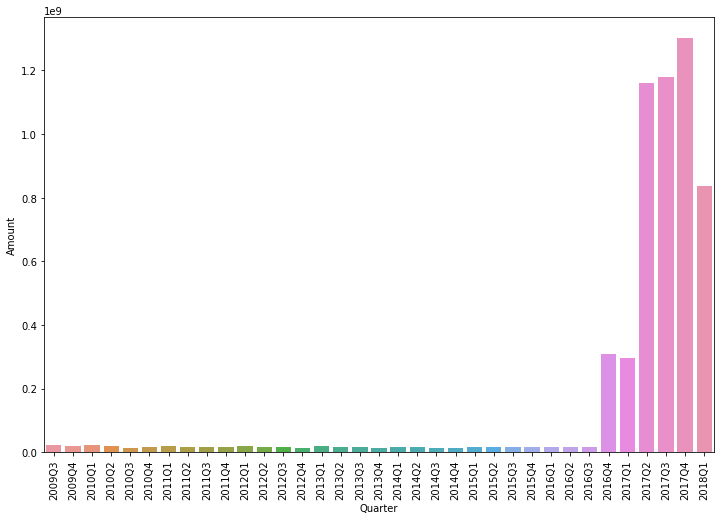

In [206]:
fig = plt.figure(figsize = (12, 8))
sns.barplot(x='Quarter', y='Amount', data=exp_df)
plt.xticks(rotation=90)

Observation: From 2016Q4 onwards spending has increased several times each quarter compared to the quarters from 2009Q3 to 2016Q3. This can possibly be attributed to the 2016 elections and changes in Congress. 

## Yearly spending from 2010Q1 to 2017Q4

In [208]:
exp_df.head(2)

,Amount,Quarter
0,2.110680e+07,2009Q3
1,1.879568e+07,2009Q4


In [209]:
exp_df.tail(2)

,Amount,Quarter
33,1.302042e+09,2017Q4
34,8.371226e+08,2018Q1


In [210]:
# Take only full years from 2010Q1 to 2017Q4
exp_df = exp_df[2: 34]

In [224]:
year = 2010
year_list = []
annual_amount_list = []
for i in range(8):
    annual_amount = 0
    annual_amount = exp_df['Amount'][4*i : 4*i + 4].sum() 
    annual_amount_list.append(annual_amount)
    year_list.append(year)
    year += 1


In [228]:
year_df = pd.DataFrame({'Year': year_list, 
                        'Annual_Amount' : annual_amount_list})
year_df

,Annual_Amount,Year
0,7.143188e+07,2010
1,7.134186e+07,2011
2,6.529872e+07,2012
3,6.359652e+07,2013
4,6.196681e+07,2014
5,6.279685e+07,2015
6,3.578141e+08,2016
7,3.938861e+09,2017


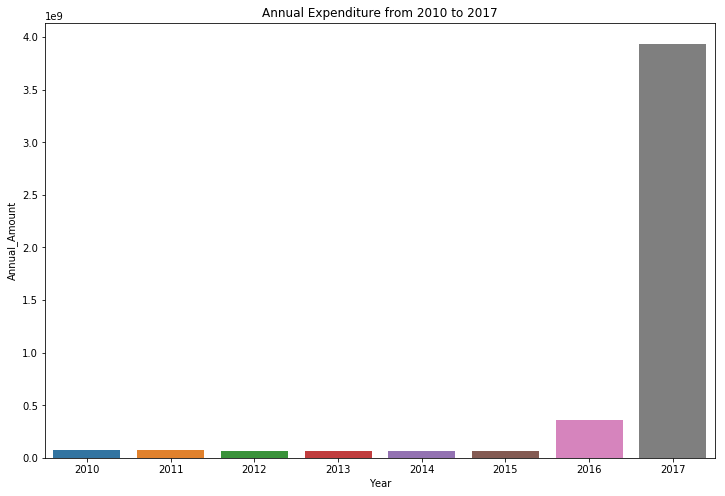

In [231]:
#Plot the Annual Expenditure from 2010 to 2017
fig = plt.figure(figsize = (12, 8))
sns.barplot(x='Year', y='Annual_Amount', data=year_df)
plt.xticks()
plt.title("Annual Expenditure from 2010 to 2017")

Observation: Annual Spending has become very high from 2016 onwards.